In [1]:
# HIDE CODE

import os
import sys
import h5py
import pickle
import numpy as np
import pandas as pd
from os.path import join as pjoin
from copy import deepcopy as dc
from tqdm.notebook import tqdm
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

github_path = pjoin(os.environ['HOME'], 'Dropbox/git/A1ToneDiscrimination/')
sys.path.insert(0, github_path)
from utils.process import *
from utils.generic_utils import *
from utils.plot_functions import *

In [ ]:
dirs_dict = get_dirs()
df_all = pd.read_pickle(dirs_dict['df_load_file'])
output_trial, output_freq = bag_of_trajectories(dirs_dict['h_load_file'])

In [214]:
name = "scabbers_2016-09-23"

f = h5py.File(dirs_dict['h_load_file'], 'r')
behavior = f[name]['behavior']
passive = f[name]['passive']

good_cells_b = np.array(behavior["good_cells"], dtype=int)
good_cells_p = np.array(passive["good_cells"], dtype=int)
good_cells = set(good_cells_b).intersection(set(good_cells_p))
good_cells = sorted(list(good_cells))

dff = np.array(behavior['dff'], dtype=float)[..., good_cells]
nt, ntrials, nc = dff.shape

trial_info = {}
for k, v in behavior["trial_info"].items():
    trial_info[k] = np.array(v, dtype=int)

In [216]:
dff.shape

(135, 218, 62)

In [215]:
trial_info

{'correctreject': array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]),
 'early': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0,

In [212]:
behavior.keys()

<KeysViewHDF5 ['dff', 'firstresponse', 'good_cells', 'metadata', 'nontargetlick', 'targetlick', 'trial_info', 'xy']>

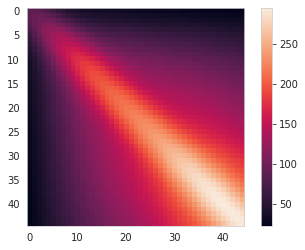

In [198]:
pca_full, pca = pca_dict['all']
cov = pca.get_covariance()

plt.imshow(cov)
plt.grid()
plt.colorbar()

In [44]:
output_trial['df'].trial

0                hit
1                hit
2                hit
3                hit
4                hit
             ...    
204731    falsealarm
204732    falsealarm
204733    falsealarm
204734    falsealarm
204735    falsealarm
Name: trial, Length: 204736, dtype: object

In [52]:
output_trial['df'].trial

0                hit
1                hit
2                hit
3                hit
4                hit
             ...    
204731    falsealarm
204732    falsealarm
204733    falsealarm
204734    falsealarm
204735    falsealarm
Name: trial, Length: 204736, dtype: object